<a href="https://colab.research.google.com/github/rheopy/rheofit/blob/master/data/Rheology%20finds%20distinct%20glass%20and%20jamming%20transitions%20in%20emulsions/TC_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/rheopy/rheofit.git

  Cloning https://github.com/rheopy/rheofit.git to /tmp/pip-req-build-lqpg31yi
  Running command git clone -q https://github.com/rheopy/rheofit.git /tmp/pip-req-build-lqpg31yi
     |████████████████████████████████| 266kB 5.1MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 256kB 7.3MB/s 
  Created wheel for rheofit: filename=rheofit-0.1.0-cp36-none-any.whl size=9874 sha256=aadabce6dc6ba360efc443ec17d1abc56ebeb56acb472231530ecb9b37b61104
  Stored in directory: /tmp/pip-ephem-wheel-cache-4cai878c/wheels/a4/58/61/22fb357c158d287fa7e6b6a2b1cc7379d68d1d40fdbb8daf64
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=c40a73d818ef0ce86475dcffea59f718fd285c4218f6ffb380a54fe016ad55ed
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl s

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
from IPython.display import Math

import rheofit
import pybroom as pb
import corner

import seaborn as sns
import io
from scipy.interpolate import UnivariateSpline
import numpy as np


In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [5]:
!git clone https://github.com/rheopy/rheofit.git

Cloning into 'rheofit'...
remote: Enumerating objects: 471, done.
remote: Total 471 (delta 0), reused 0 (delta 0), pack-reused 471
Receiving objects: 100% (471/471), 3.00 MiB | 2.80 MiB/s, done.
Resolving deltas: 100% (280/280), done.


In [6]:
#data 0.775 volume fraction
data_string='''
0.004664445252037807, 116.69146874283844
0.01022350938503232, 132.71042131661662
0.021677041048196986, 129.3396983017573
0.04647292416762045, 154.86173980916885
0.10073954848112522, 176.12055926033923
0.22325438616167465, 200.2977070540318
0.46816613972436466, 239.82158456722792
1.0261243651933434, 265.81593091892864
2.1998851090492515, 318.2682352873545
4.716284552998383, 371.39187829872714
10.111137119549078, 468.15650413749466
21.917953438441288, 706.5810913029673
'''
FC = pd.read_csv(io.StringIO(data_string),names=['Shear rate','Stress']).drop(axis='index',index=0).astype('float')
FC.to_excel('FC_0775.xlsx')

In [7]:
#data 0.703 volume fraction
data_string='''
0.0045624697707685145, 2.6312860738959447
0.009890084450210678, 2.9935772947204935
0.021438776659735113, 3.4057509399566888
0.04647292416762045, 3.6798179244566867
0.09963226419544191, 3.874675120456136
0.21597326806893966, 4.4081635896935785
0.46816613972436466, 5.560297632845831
1.0148456628180957, 7.7760009060380435
2.1281390459827136, 9.077853991937559
4.716284552998373, 13.367506999197092
10, 21.82406137003982
21.917953438441288, 35.63040249104585
'''
FC = pd.read_csv(io.StringIO(data_string),names=['Shear rate','Stress']).drop(axis='index',index=0).astype('float')
FC.to_excel('FC_0703.xlsx')





In [8]:
#data 0.670 volume fraction
data_string='''
0.004664445252037807, 0.27175257595052066
0.010000000000000021, 0.24510701572970386
0.021438776659735113, 0.22979709690469674
0.04647292416762045, 0.20460882894660132
0.10073954848112522, 0.2099562713922496
0.2135993860189796, 0.2388643078984598
0.46302026586030887, 0.30129477247270015
1.0036909309200985, 0.42135665722144633
2.1517905703397573, 0.6879153716865838
4.6644452520377975, 1.2134827677491455
10, 2.3128403649003477
21.67704104819692, 5.01510594550508
'''
FC = pd.read_csv(io.StringIO(data_string),names=['Shear rate','Stress']).drop(axis='index',index=0).astype('float')
FC.to_excel('FC_0670.xlsx')





In [9]:
data_dict={}

data=pd.read_excel('FC_0775.xlsx')
int_y=UnivariateSpline(data['Shear rate'],data['Stress'],k=1)
int_x=np.logspace(np.log10(min(data['Shear rate'])),np.log10(max(data['Shear rate'])),100)
int_data=pd.DataFrame()
int_data['Shear rate']=int_x
int_data['Stress']=int_y(int_x)
data_dict['FC_0775.xlsx']=data

data=pd.read_excel('FC_0703.xlsx')
int_y=UnivariateSpline(data['Shear rate'],data['Stress'],k=1)
int_x=np.logspace(np.log10(min(data['Shear rate'])),np.log10(max(data['Shear rate'])),100)
int_data=pd.DataFrame()
int_data['Shear rate']=int_x
int_data['Stress']=int_y(int_x)
data_dict['FC_0703.xlsx']=data

data=pd.read_excel('FC_0670.xlsx')
int_y=UnivariateSpline(data['Shear rate'],data['Stress'],k=1)
int_x=np.logspace(np.log10(min(data['Shear rate'])),np.log10(max(data['Shear rate'])),100)
int_data=pd.DataFrame()
int_data['Shear rate']=int_x
int_data['Stress']=int_y(int_x)
data_dict['FC_0670.xlsx']=data


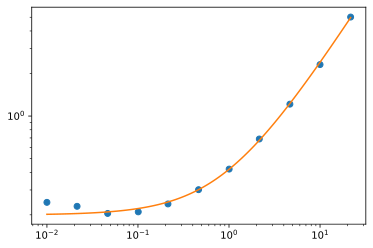

In [10]:
plt.loglog(data['Shear rate'], data['Stress'],'o')
plt.loglog(int_data['Shear rate'], int_data['Stress'])

In [11]:
TC=rheofit.models.TC_model

In [12]:
par_wid=rheofit.visualization.make_par_widget(TC,data_dict['FC_0775.xlsx'])

In [17]:
#params=rheofit.visualization.make_par_from_widget(par_wid)

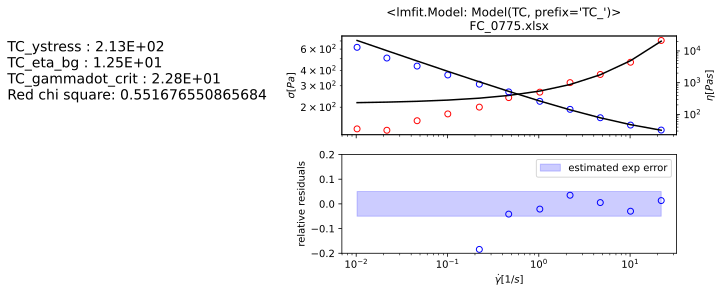

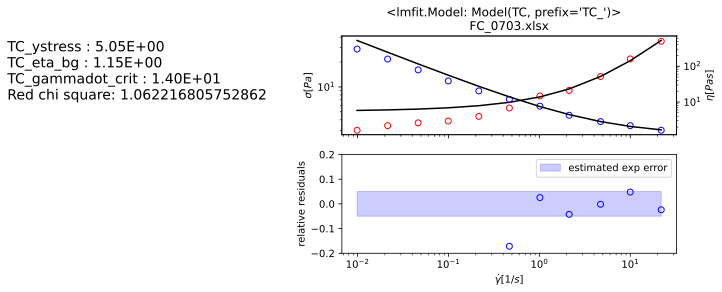

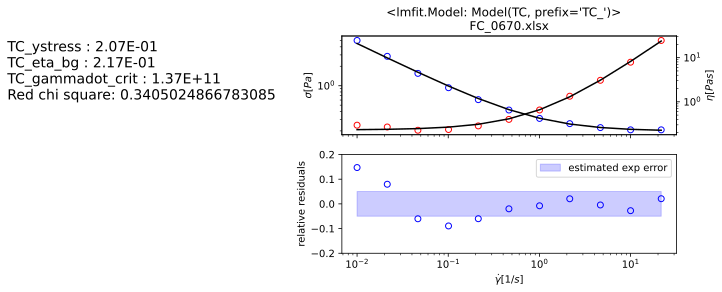

In [18]:
fit_res_dict={}

model = TC

min_shear_rate=1

max_shear_rate=10000

for filename, data in data_dict.items():
    mask=(data['Shear rate']>=min_shear_rate) & (data['Shear rate']<=max_shear_rate)    
    fit_res=model.fit(data['Stress'],x=data['Shear rate'],params=params,
                                     weights=1/(0.05*data[mask]['Stress']),
                                     nan_policy='omit')
    fit_res_dict[filename]=fit_res
    rheofit.visualization.update_par_widget(par_wid,fit_res)
    
for filename,fit_res in fit_res_dict.items():
    rheofit.visualization.plot_fit_res(fit_res, show_par_values=True);
    plt.title(filename)

In [ ]:
for filename,fit_res in fit_res_dict.items():
    rheofit.visualization.plot_fit_res(fit_res, show_par_values=True);
    plt.title(filename)

In [ ]:
table_result=pb.tidy(fit_res_dict)
table_result.pivot(index='key', columns='name', values='value')

name,TCn_eta_bg,TCn_gammadot_crit,TCn_n,TCn_ystress,carreau_eta_0,carreau_gammadot_crit,carreau_n,carreau_stress_plateau
key,,,,,,,,
HS60_10las_full_15.xls,0.0,0.005724,0.5,0.073187,7.053373,35.444035,0.0,250.0
HS60_10las_full_30.xls,0.0,0.040274,0.5,0.065492,0.846465,295.345953,0.0,250.0
HS60_10las_full_40.xls,0.0,0.416225,0.5,0.073149,0.197939,1263.018045,0.0,250.0
HS60_10las_full_50.xls,0.0,2.241467,0.5,0.082405,0.058819,4250.318606,0.0,250.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(**kwargs)


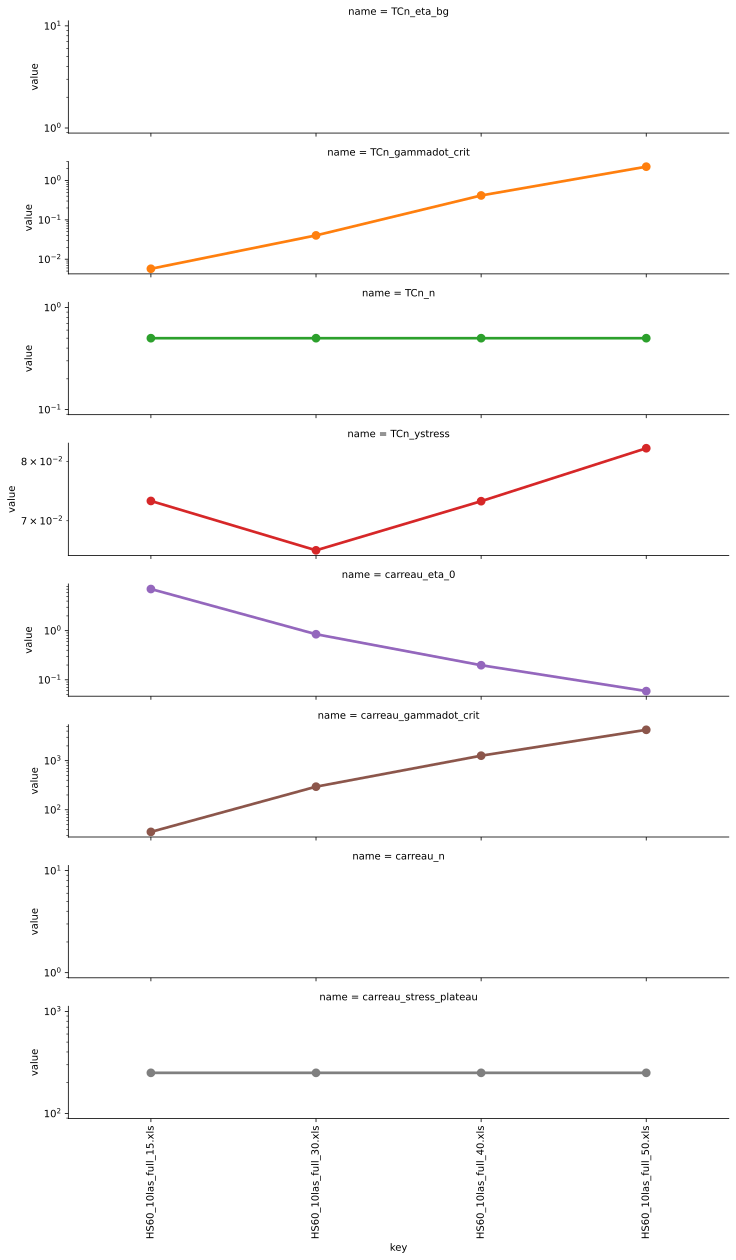

In [ ]:
g = sns.catplot(x="key", y="value",
                hue="name", row="name",
                data=pb.tidy(fit_res_dict), kind="point",
                dodge=False,
                sharey=False,
                height=2, aspect=5).set_xticklabels(rotation=90).set(yscale="log")

/usr/local/lib/python3.6/dist-packages/lmfit/model.py:1499: RuntimeWarning: invalid value encountered in add
  df2 += fjac[i]*fjac[j]*covar[i, j]


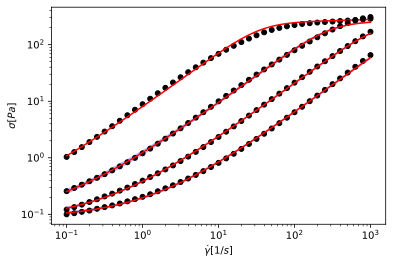

In [ ]:
for filename, fit_res in fit_res_dict.items():
    rheofit.visualization.plot_confidence(fit_res,expand=1)

In [ ]:
#importing data from trios exported excel file
#importing 3rd step in the procedure

data_folder='./rheofit/notebooks/data/'

data_file_list_solvent=['las10_15_full.xls',
                'las10_20_full.xls',
                'las10_30_full.xls',
                'las10_40_full.xls']


data_dict_solvent={}
for filename in data_file_list_solvent:
    data_dict_solvent[filename]=pd.read_excel(f'{data_folder}/{filename}',sheet_name=3,skiprows=[0,2])

In [ ]:
carreau=rheofit.models.carreau_model
carreau.set_param_hint('carreau_n',value=0, vary=False)
model_solvent=carreau

In [ ]:
par_wid_solvent=rheofit.visualization.make_par_widget(model_solvent,data_dict_solvent[data_file_list_solvent[0]])

In [ ]:
params=rheofit.visualization.make_par_from_widget(par_wid_solvent)

params.add('carreau_stress_plateau', value=180, min=0, vary=False)
params.add('carreau_eta_0', expr='carreau_stress_plateau/carreau_gammadot_crit')
params

name,value,initial value,min,max,vary,expression
carreau_eta_0,3.34918587,None,-inf,inf,False,carreau_stress_plateau/carreau_gammadot_crit
carreau_gammadot_crit,53.7444045,53.74440453732464,0.00000000,inf,True,
carreau_n,0.00000000,0.0,0.00000000,1.00000000,False,
carreau_stress_plateau,180.000000,180,0.00000000,inf,False,


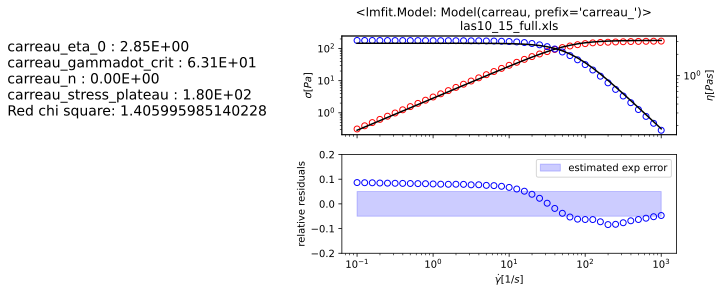

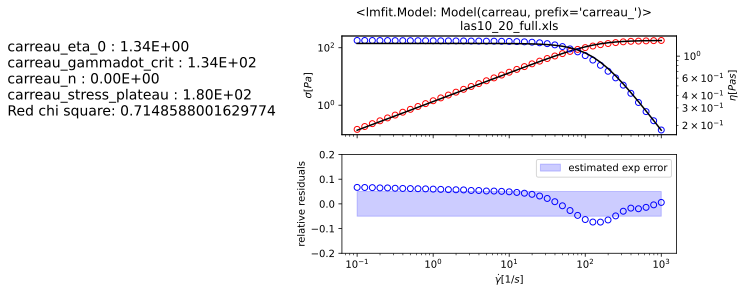

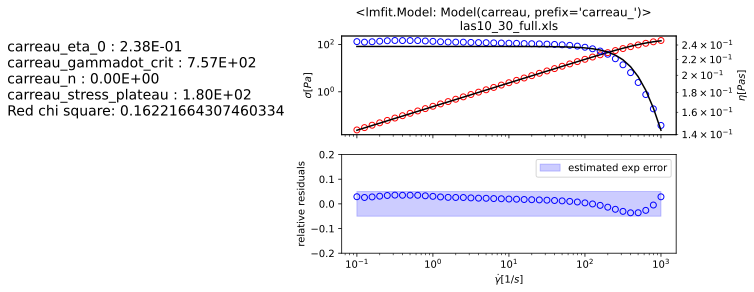

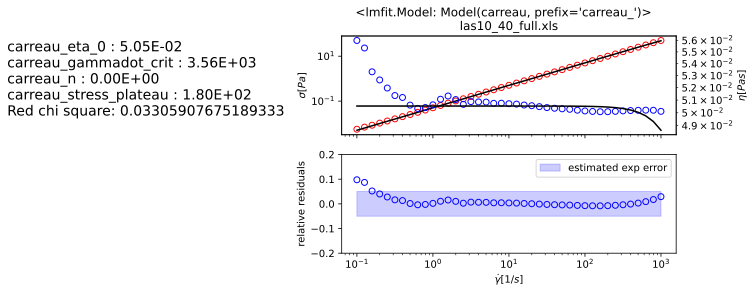

In [ ]:
fit_res_dict_solvent={}

min_shear_rate=10
max_shear_rate=10000

for filename, data in data_dict_solvent.items():
    mask=(data['Shear rate']>=min_shear_rate) & (data['Shear rate']<=max_shear_rate)    
    fit_res=model_solvent.fit(data['Stress'],x=data['Shear rate'],params=params,
                                     weights=1/(0.05*data[mask]['Stress']),
                                     nan_policy='omit')
    fit_res_dict_solvent[filename]=fit_res
    
    
for filename,fit_res in fit_res_dict_solvent.items():
    rheofit.visualization.plot_fit_res(fit_res, show_par_values=True);
    plt.title(filename)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(**kwargs)


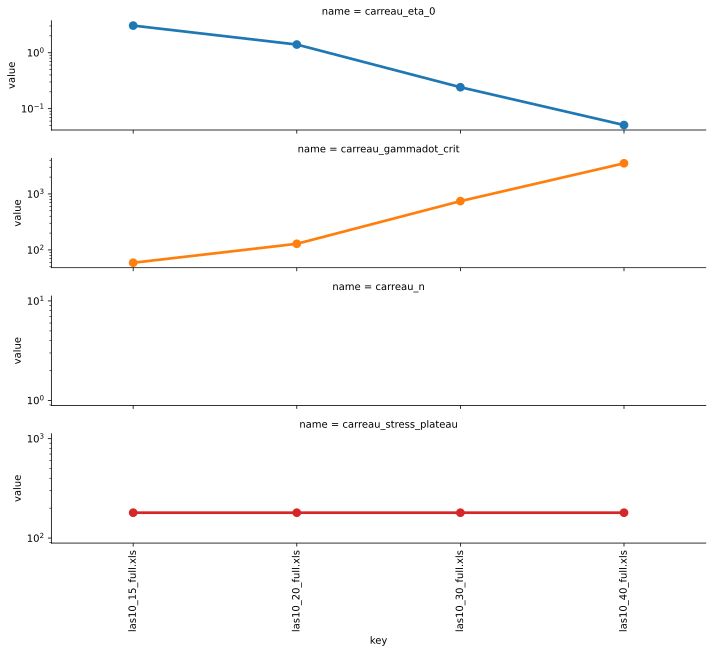

In [ ]:
g = sns.catplot(x="key", y="value",
                hue="name", row="name",
                data=pb.tidy(fit_res_dict_solvent), kind="point",
                dodge=False,
                sharey=False,
                height=2, aspect=5).set_xticklabels(rotation=90).set(yscale="log")